In [3]:
#count plots
#binning
#replace with re and normal replace
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [218]:
data=pd.read_csv('Churn_Modelling.csv')

In [196]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Analysis

In [199]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


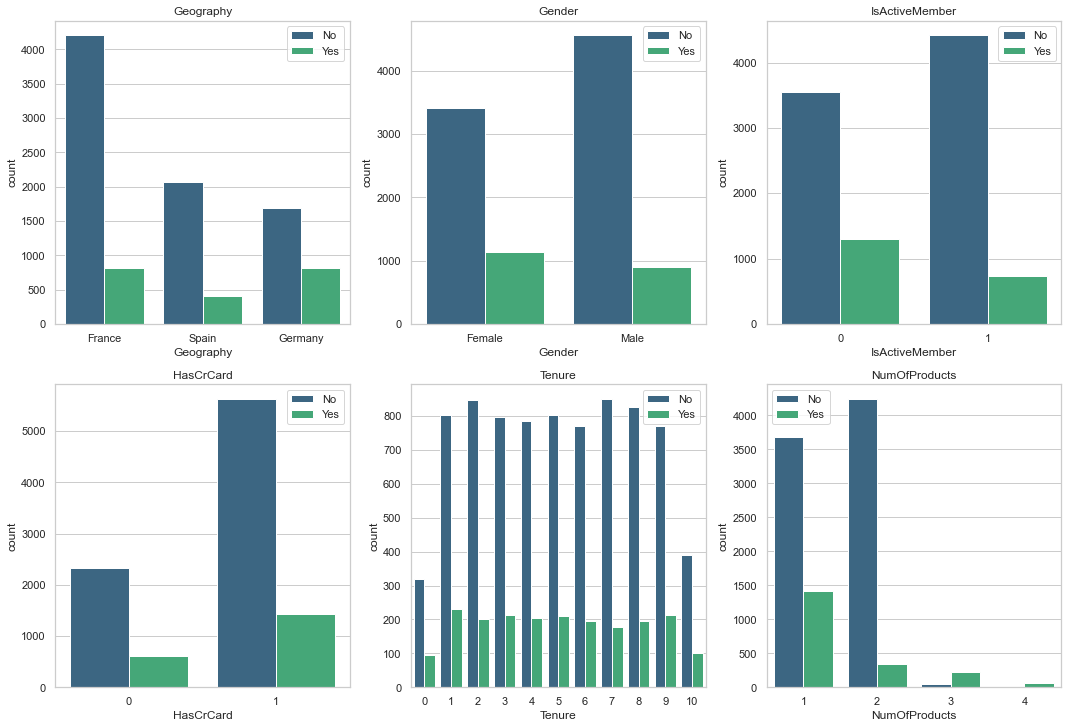

In [200]:
def count(x, fig):
    plt.subplot(6,3,fig)
    sns.countplot(x=x,data=data,hue='Exited',palette = "viridis")
    plt.title(x)
    plt.legend(labels=['No','Yes'])
    
plt.figure(figsize=(15,30))

count('Geography',1)
count('Gender',2)
count('IsActiveMember',3)
count('HasCrCard',4)
count('Tenure',5)
count('NumOfProducts',6)

plt.tight_layout()

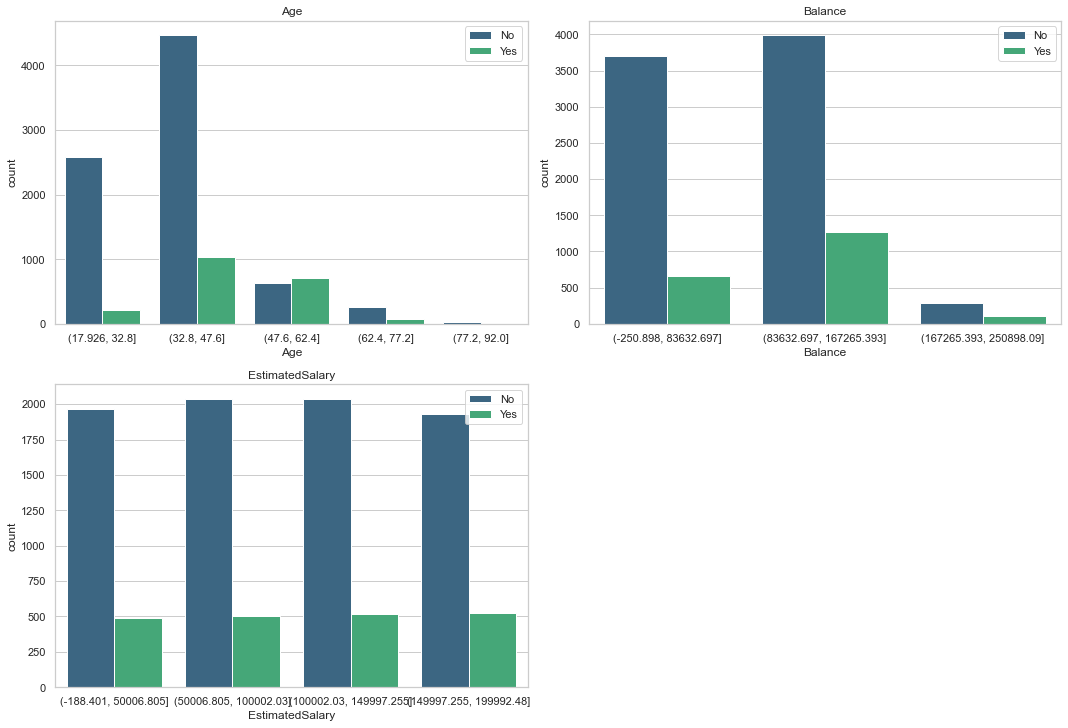

In [124]:
def count(x,num_bins, fig):
    plt.subplot(6,2,fig)
    sns.countplot(x=(pd.cut(df[x], bins=num_bins)),data=data,hue='Exited',palette = "viridis")
    plt.title(x)
    plt.legend(labels=['No','Yes'])
    
plt.figure(figsize=(15,30))

count('Age',5,1)
count('Balance',3,2)
count('EstimatedSalary',4,3)

#Age,Balance,EstimatedSalary

plt.tight_layout()



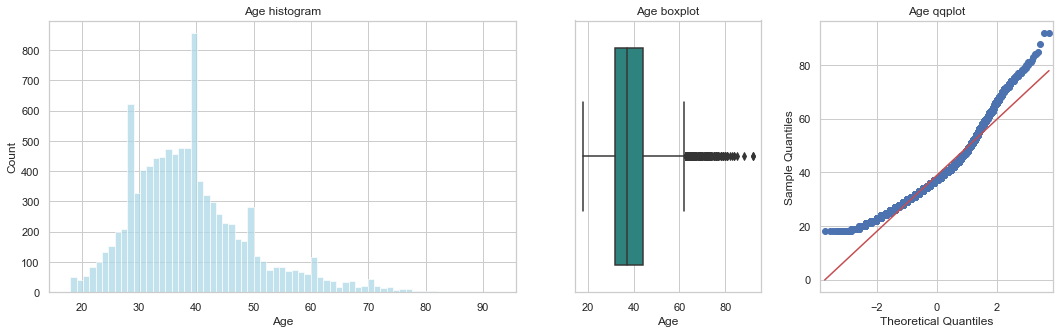

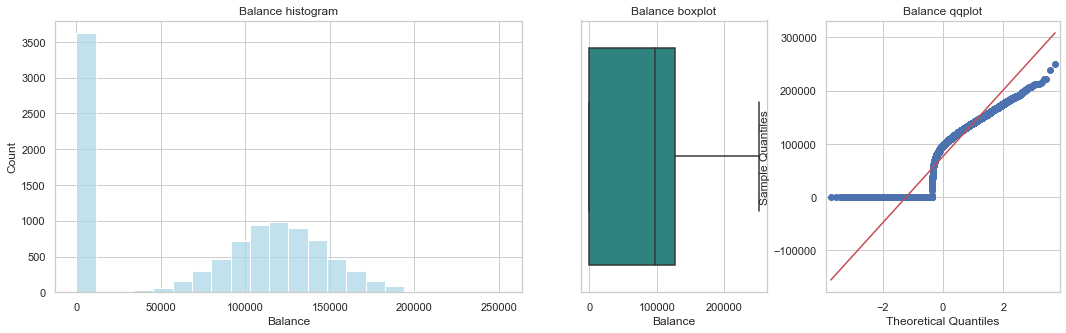

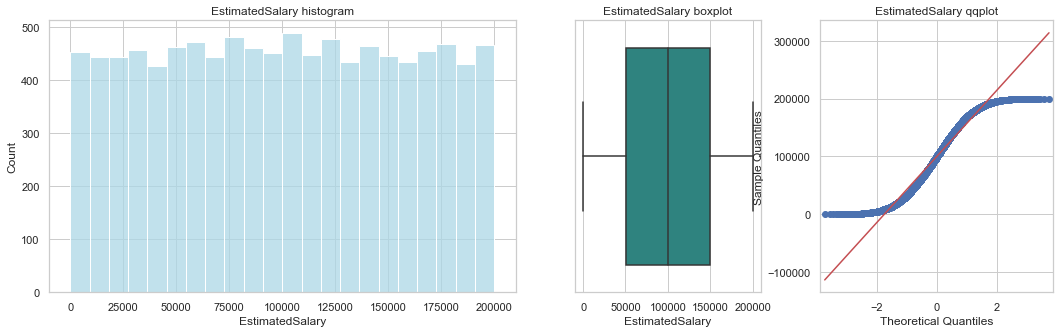

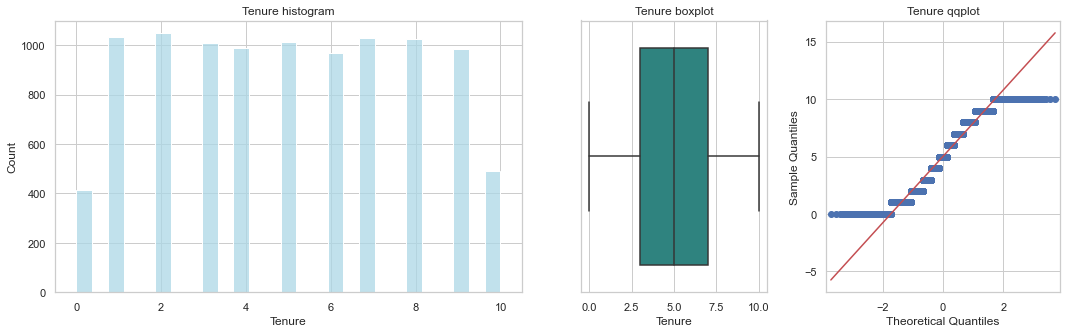

In [134]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.gofplots import qqplot
def generate_numerical_viz(data):
    for i in data[['Age','Balance','EstimatedSalary','Tenure']]:
        fig, axes = plt.subplots(1,3,figsize = (18,5),gridspec_kw={'width_ratios': [2, 0.8,1]})
        sns.histplot(data[i],ax=axes[0],color = 'lightblue')
        axes[0].set_title(f"{i} histogram")
        sns.boxplot(data[i],ax=axes[1],palette = "viridis")
        axes[1].set_title(f"{i} boxplot")
        qqplot(data[i],ax = axes[2],line="s")    
        axes[2].set_title(f"{i} qqplot")
        plt.show()
        
generate_numerical_viz(data)

#### creating heatmap and checking co-relation to know effect of variables on churn of data

In [487]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

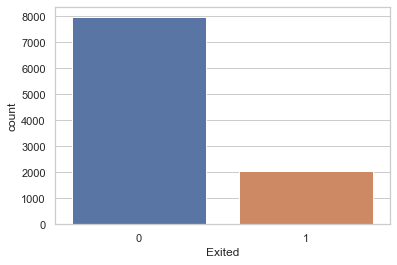

In [408]:
sns.countplot(data['Exited'])

In [13]:
#data is clean we just have to encode and standarize it.

In [289]:
df=data.iloc[:,3:]

In [290]:
import category_encoders as ce
encoder = ce.OrdinalEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [291]:
df=pd.concat([df,pd.get_dummies(df['Geography'])],axis=1)

In [292]:
df=df.drop(columns=['Geography'])

In [293]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [171]:
from scipy import stats
def corr(x):
    pearson_coef, p_value = stats.pearsonr(df[x], df['Exited'])
    print('For: ',x)
    print("The Pearson Correlation:", pearson_coef)
    print(" P-value:", p_value) 
    print("-"*13)
  

In [172]:
for i in df.columns:
    corr(i)

For:  CreditScore
The Pearson Correlation: -0.02709353975465779
 P-value: 0.006738213892225283
-------------
For:  Gender
The Pearson Correlation: -0.10651248767347357
 P-value: 1.2585045636893175e-26
-------------
For:  Age
The Pearson Correlation: 0.28532303783506824
 P-value: 1.2399313093495365e-186
-------------
For:  Tenure
The Pearson Correlation: -0.014000612253444653
 P-value: 0.16152684949563412
-------------
For:  Balance
The Pearson Correlation: 0.11853276877163402
 P-value: 1.275563319158762e-32
-------------
For:  NumOfProducts
The Pearson Correlation: -0.04781986494944074
 P-value: 1.717333004813084e-06
-------------
For:  HasCrCard
The Pearson Correlation: -0.007137765603038897
 P-value: 0.47541491837892763
-------------
For:  IsActiveMember
The Pearson Correlation: -0.1561282781889048
 P-value: 1.3482685164949119e-55
-------------
For:  EstimatedSalary
The Pearson Correlation: 0.012096861026844645
 P-value: 0.2264404280235202
-------------
For:  Exited
The Pearson Corre

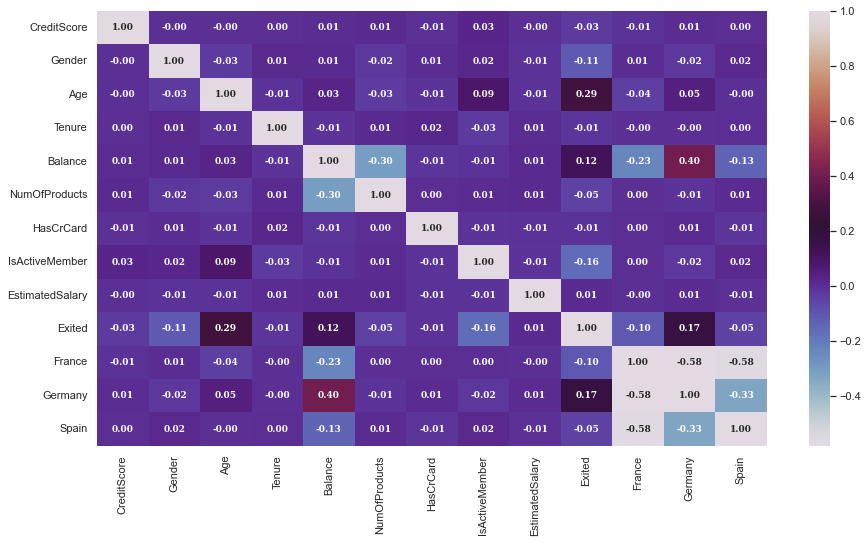

In [173]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method= 'pearson'),annot=True,fmt=".2f",
                cmap="twilight",
                annot_kws={
                       "fontsize":9,
                       "fontweight":"bold",
                       "fontfamily":"serif"});

In [176]:
import pandas as pd

# Set options to display more rows and columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns




## undertanding differences in churn based on different feature

In [183]:
data.groupby(['Exited','Gender'])['Age'].mean()

Exited  Gender
0       Female    37.382491
        Male      37.427725
1       Female    44.784899
        Male      44.905345
Name: Age, dtype: float64

In [187]:
data.groupby(['Exited','Gender'])['EstimatedSalary'].median()

Exited  Gender
0       Female    101026.530
        Male       98060.510
1       Female    106663.460
        Male       98083.205
Name: EstimatedSalary, dtype: float64

In [220]:
data.groupby(['Exited','Gender'])['HasCrCard'].sum()

Exited  Gender
0       Female    2397
        Male      3234
1       Female     795
        Male       629
Name: HasCrCard, dtype: int64

In [237]:
geography=pd.DataFrame(data.groupby(['Exited','Gender'])['Geography'].value_counts())

In [238]:
geography.columns=['counts']

In [271]:
geography


counts
Exited Gender Geography        
0      Female France       1801
              Spain         858
              Germany       745
       Male   France       2403
              Spain        1206
              Germany       950
1      Female France        460
              Germany       448
              Spain         231
       Male   Germany       366
              France        350
              Spain         182

In [280]:
avg=[]
for i,k in zip(geography.index,geography.counts):
    for j,l in zip(data.groupby(['Gender'])['Geography'].value_counts().index,data.groupby(['Gender'])['Geography'].value_counts()):
        if i[2]==j[1] and i[1]==j[0]:
            avg.append(round((k/l)*100,2))
 

In [281]:
geography["Average"]=avg

In [282]:
geography

counts  Average
Exited Gender Geography                 
0      Female France       1801    79.66
              Spain         858    78.79
              Germany       745    62.45
       Male   France       2403    87.29
              Spain        1206    86.89
              Germany       950    72.19
1      Female France        460    20.34
              Germany       448    37.55
              Spain         231    21.21
       Male   Germany       366    27.81
              France        350    12.71
              Spain         182    13.11

#### this chart over here gives a summary of population over the different geography exiting or staying in data (based on gender), Average gives an idea of percentage of how many either of each gender staying or leaving 

In [185]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [284]:
pd.DataFrame(data.groupby(['Exited','Geography'])['Tenure'].mean())

Tenure
Exited Geography          
0      France     5.005471
       Germany    5.011799
       Spain      5.107558
1      France     5.000000
       Germany    5.006143
       Spain      4.656174

In [286]:
pd.DataFrame(data.groupby(['Exited','Geography'])['Balance'].mean())

Balance
Exited Geography               
0      France      60339.275678
       Germany    119427.106696
       Spain       59678.070470
1      France      71192.795728
       Germany    120361.075590
       Spain       72513.352446

In [287]:
pd.DataFrame(data.groupby(['Exited'])['Balance'].mean())

,Balance
Exited,
0,72745.296779
1,91108.539337


# training model

In [294]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [331]:
X=df.drop(columns=['Exited'])
y=df.Exited

In [333]:
X.shape,y.shape

((10000, 12), (10000,))

In [335]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape

((8000, 12), (8000,))

In [344]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Tenure','EstimatedSalary','NumOfProducts','Age','Balance','CreditScore']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


In [345]:
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [409]:

model = keras.Sequential([
    keras.layers.Dense(23, activation='relu', input_shape=(12,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4776 - accuracy: 0.7950
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8205
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8425
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8512
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8561
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8556
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8550
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8572
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8568
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8572

In [480]:

model = keras.Sequential([
    keras.layers.Dense(23, activation='relu', input_shape=(12,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=90)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/90
250/250 [==============================] - 1s 2ms/step - loss: 0.5279 - accuracy: 0.7653
Epoch 2/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7921
Epoch 3/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7928
Epoch 4/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7979
Epoch 5/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7974
Epoch 6/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7991
Epoch 7/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8025
Epoch 8/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8080
Epoch 9/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8155
Epoch 10/90
250/250 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8200

250/250 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8514
Epoch 83/90
250/250 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8522
Epoch 84/90
250/250 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8489
Epoch 85/90
250/250 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8533
Epoch 86/90
250/250 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8526
Epoch 87/90
250/250 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8494
Epoch 88/90
250/250 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8529
Epoch 89/90
250/250 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8501
Epoch 90/90
63/63 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8605
Test loss: 0.3432
Test accuracy: 0.8605


In [481]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy

63/63 [==============================] - 0s 1ms/step


0.8605

In [482]:
model.evaluate(X_train,y_train)

250/250 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8679


[0.33518585562705994, 0.8678749799728394]

In [483]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Test accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Test accuracy: 0.8605
Confusion Matrix:
[[1541   66]
 [ 213  180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



<AxesSubplot:>

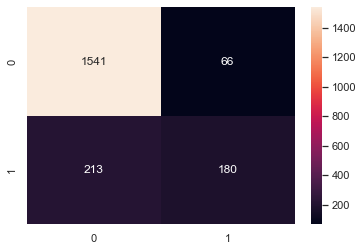

In [484]:
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [486]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])